In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
evaluation_data = pd.read_csv('./results/results_31_05_2022_05_19_28.csv')

# Results Analysis

In [3]:
evaluation_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
evaluation_data.head(10)

,Algorithm,Instance,Number of States,Extracted Number of States,RunNumber,Time (s),LastTokenQuery,EquivalenceQuery,OT Prefixes,OT Suffixes,Tree Depth,Inner Nodes,LogProbError,WER,NDCG,OOPartition,OOTolerance,AbsoluteError
0,WLStarLearner,PDFA - 618e53e4e4e741a08b915a52c0d456d5,56,56,1,0.592232,810,5,117.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.000000e+00
1,WLStarLearner,PDFA - 618e53e4e4e741a08b915a52c0d456d5,56,56,2,0.621421,810,5,117.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.000000e+00
2,WLStarLearner,PDFA - 618e53e4e4e741a08b915a52c0d456d5,56,56,3,0.591645,810,5,117.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.000000e+00
3,WLStarLearner,PDFA - 618e53e4e4e741a08b915a52c0d456d5,56,56,4,0.575616,810,5,117.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.000000e+00
4,WLStarLearner,PDFA - 618e53e4e4e741a08b915a52c0d456d5,56,56,5,0.587780,810,5,117.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.000000e+00
5,WLStarLearner,PDFA - 618e53e4e4e741a08b915a52c0d456d5,56,56,6,0.584399,810,5,117.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.000000e+00
6,WLStarLearner,PDFA - 618e53e4e4e741a08b915a52c0d456d5,56,56,7,0.597878,810,5,117.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.000000e+00
7,WLStarLearner,PDFA - 618e53e4e4e741a08b915a52c0d456d5,56,56,8,0.560610,810,5,117.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.000000e+00
8,WLStarLearner,PDFA - 618e53e4e4e741a08b915a52c0d456d5,56,56,9,0.585897,810,5,117.0,7.0,NaN,NaN,0.0,0.0,1.0,0,0,0.000000e+00
9,WLStarLearner,PDFA - 98a96d3ac9f747cda8c6aa4f23dc4d1a,55,55,1,0.942158,1206,6,135.0,9.0,NaN,NaN,0.0,0.0,1.0,0,0,6.661338e-19


In [5]:
import math
evaluation_data['OT_SIZE'] = evaluation_data['OT Prefixes']*evaluation_data['OT Suffixes']
evaluation_data['TREE_SIZE'] = evaluation_data['Inner Nodes']+evaluation_data['Extracted Number of States']
evaluation_data['STRUCTURE_SIZE'] = evaluation_data.apply(lambda row : row['TREE_SIZE'] if math.isnan(row['OT_SIZE']) else row['OT_SIZE'], axis = 1)

In [6]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    res = Q3 - Q1
    return res

funcs =  ['median', IQR]    
grouped_multiple = evaluation_data.groupby(['Algorithm', 'Number of States']).agg({'Time (s)':funcs, 'LastTokenQuery':funcs, 'EquivalenceQuery':funcs, 'LogProbError':funcs,'WER':funcs,'NDCG':funcs,'OOPartition':funcs, 'OOTolerance':funcs, 'Extracted Number of States':funcs, 'STRUCTURE_SIZE':funcs, 'AbsoluteError': funcs, 'Tree Depth':funcs })
grouped_multiple.columns = ['Time(s)_median','Time(s)_IQR', 'MembershipQuery_median', 'MembershipQuery_IQR', 
'EquivalenceQuery_median', 'EquivalenceQuery_IQR', 'LogProbError_median','LogProbError_IQR',
'WER_median','WER_IQR','NDCG_median','NDCG_IQR','OOPartition_median','OOPartition_IQR', 'OOTolerance_median','OOTolerance_IQR', 'Extracted Number of States_median', 'Extracted Number of States_IQR', 'STRUCTURE_SIZE_median', 'STRUCTURE_SIZE_IQR', 'AbsoluteError_median', 'AbsoluteError_IQR', 'TreeDepth_median', 'TreeDepth_IQR']
grouped_multiple.reset_index(inplace = True)

In [7]:
grouped_multiple

,Algorithm,Number of States,Time(s)_median,Time(s)_IQR,MembershipQuery_median,MembershipQuery_IQR,EquivalenceQuery_median,EquivalenceQuery_IQR,LogProbError_median,LogProbError_IQR,...,OOTolerance_median,OOTolerance_IQR,Extracted Number of States_median,Extracted Number of States_IQR,STRUCTURE_SIZE_median,STRUCTURE_SIZE_IQR,AbsoluteError_median,AbsoluteError_IQR,TreeDepth_median,TreeDepth_IQR
0,QuantNaryTreeLearner,48,0.505377,0.012563,582.0,0.0,23.0,0.0,0.0,0.0,...,0.0,0.0,48.0,0.0,69.0,0.0,0.000000e+00,0.000000e+00,4.0,0.0
1,QuantNaryTreeLearner,50,0.708141,0.094205,657.0,54.0,29.5,3.0,0.0,0.0,...,0.0,0.0,50.0,0.0,77.5,3.0,0.000000e+00,0.000000e+00,4.5,1.0
2,QuantNaryTreeLearner,51,0.740204,0.030996,687.0,6.0,30.0,0.0,0.0,0.0,...,0.0,0.0,51.0,0.0,79.0,0.0,0.000000e+00,0.000000e+00,4.0,0.0
3,QuantNaryTreeLearner,53,0.871933,0.182372,721.5,27.0,33.5,3.0,0.0,0.0,...,0.0,0.0,53.0,0.0,84.5,3.0,0.000000e+00,0.000000e+00,4.5,1.0
4,QuantNaryTreeLearner,55,0.833544,0.045619,735.0,48.0,32.0,0.0,0.0,0.0,...,0.0,0.0,55.0,0.0,85.0,0.0,0.000000e+00,0.000000e+00,5.0,0.0
5,QuantNaryTreeLearner,56,0.776095,0.121523,708.0,0.0,31.0,0.0,0.0,0.0,...,0.0,0.0,56.0,0.0,85.0,0.0,0.000000e+00,0.000000e+00,4.0,0.0
6,QuantNaryTreeLearner,93,2.348581,0.396963,1302.0,138.0,51.0,8.0,0.0,0.0,...,0.0,0.0,93.0,0.0,142.0,8.0,0.000000e+00,0.000000e+00,5.0,0.0
7,QuantNaryTreeLearner,98,3.184047,0.134218,1408.5,33.0,56.0,0.0,0.0,0.0,...,0.0,0.0,98.0,0.0,152.0,0.0,0.000000e+00,0.000000e+00,5.0,0.0
8,QuantNaryTreeLearner,100,2.771420,0.025436,1425.0,0.0,56.0,0.0,0.0,0.0,...,0.0,0.0,100.0,0.0,154.0,0.0,0.000000e+00,0.000000e+00,5.0,0.0
9,QuantNaryTreeLearner,102,2.797124,0.134360,1402.5,15.0,52.5,1.0,0.0,0.0,...,0.0,0.0,102.0,0.0,152.5,1.0,0.000000e+00,0.000000e+00,4.0,0.0


In [8]:
len(grouped_multiple)

56

Text(0, 0.5, 'Learning Time Median (s)')

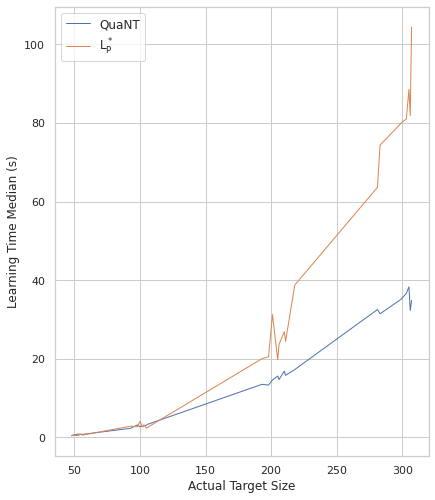

In [9]:
grouped_multiple["LOG_Time(s)_median"] = np.log(grouped_multiple["Time(s)_median"])
grouped_multiple = grouped_multiple.loc[grouped_multiple["Algorithm"] != 'WLStarColLearner' ]

import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="Number of States", y="Time(s)_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
#plt.legend(labels=["QuaNT","$\mathrm{L_{P}^*Col}$", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Learning Time Median (s)", fontsize = 12)

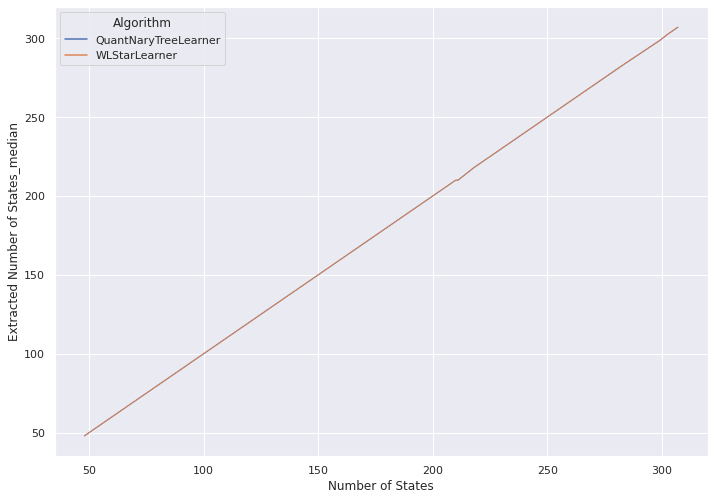

In [10]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x="Number of States", y="Extracted Number of States_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)

Text(0, 0.5, 'Speedup')

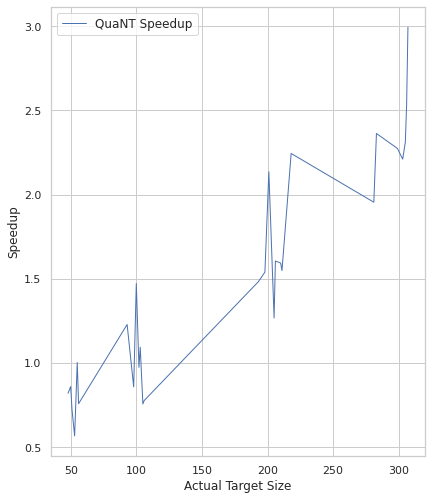

In [12]:
times_QuaNT = np.array(grouped_multiple["Time(s)_median"][0:28])
times_WLStar = np.array(grouped_multiple["Time(s)_median"][28:])
speedup_Q_WL = times_WLStar / times_QuaNT
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})

sns.set_style("whitegrid")
ax = sns.lineplot(x=grouped_multiple['Number of States'][0:28], y=speedup_Q_WL,  linewidth=1)
plt.legend(labels=["QuaNT Speedup"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Speedup", fontsize = 12)

Text(0, 0.5, 'Structure Size Median')

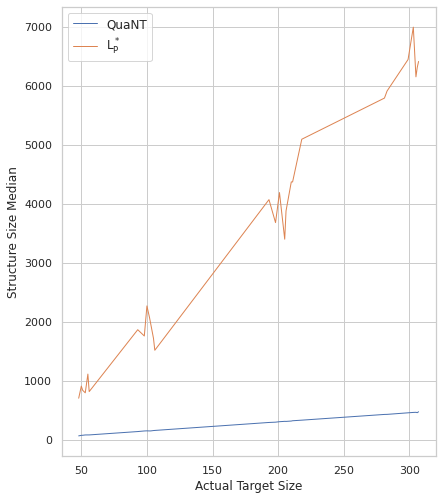

In [13]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="Number of States", y="STRUCTURE_SIZE_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Structure Size Median", fontsize = 12)

# Tree Depth Analysis

In [14]:
evaluation_data_Quant = evaluation_data.loc[evaluation_data["Algorithm"] == 'QuantNaryTreeLearner' ]
evaluation_data_Quant.columns

Index(['Algorithm', 'Instance', 'Number of States',
       'Extracted Number of States', 'RunNumber', 'Time (s)', 'LastTokenQuery',
       'EquivalenceQuery', 'OT Prefixes', 'OT Suffixes', 'Tree Depth',
       'Inner Nodes', 'LogProbError', 'WER', 'NDCG', 'OOPartition',
       'OOTolerance', 'AbsoluteError', 'OT_SIZE', 'TREE_SIZE',
       'STRUCTURE_SIZE'],
      dtype='object')

In [15]:
evaluation_data_Quant['Tree Depth'].value_counts()

5.0    162
6.0    117
4.0     81
Name: Tree Depth, dtype: int64

Text(0, 0.5, 'Tree Depth')

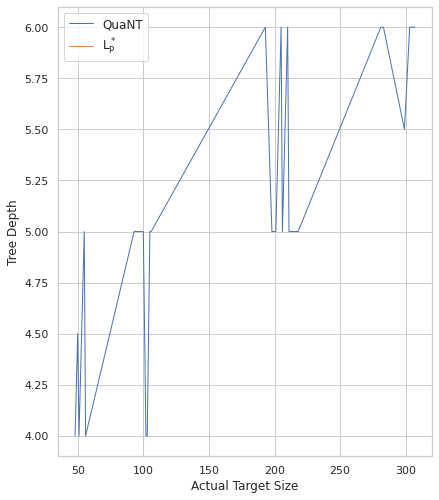

In [16]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="Number of States", y="TreeDepth_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Tree Depth", fontsize = 12)